In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
GLAXO = pd.read_csv(r"C:\Users\rajni\Desktop\MLOBA\PA2\GLAXO.csv")

In [3]:
GLAXO

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11
...,...,...,...,...,...,...,...,...
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87


In [4]:
GLAXO.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [5]:
GLAXO.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87
1738,2016-12-30,2730.00,2740.45,2705.00,2730.0,2729.80,6513.0,177.65


In [7]:
GLAXO.shape

(1739, 8)

In [8]:
GLAXO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1739 non-null   object 
 1   Open                  1739 non-null   float64
 2   High                  1739 non-null   float64
 3   Low                   1739 non-null   float64
 4   Last                  1739 non-null   float64
 5   Close                 1739 non-null   float64
 6   Total Trade Quantity  1739 non-null   float64
 7   Turnover (Lacs)       1739 non-null   float64
dtypes: float64(7), object(1)
memory usage: 108.8+ KB


In [9]:
GLAXO.skew()

C:\Users\rajni\AppData\Local\Temp\ipykernel_5956\185343830.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  GLAXO.skew()


Open                    0.487615
High                    0.487563
Low                     0.486248
Last                    0.490908
Close                   0.491397
Total Trade Quantity    6.215233
Turnover (Lacs)         7.015994
dtype: float64

In [10]:
GLAXO.kurtosis()

C:\Users\rajni\AppData\Local\Temp\ipykernel_5956\3091010061.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  GLAXO.kurtosis()


Open                    -0.952754
High                    -0.940899
Low                     -0.959511
Last                    -0.948454
Close                   -0.946953
Total Trade Quantity    56.479092
Turnover (Lacs)         71.725264
dtype: float64

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='Open', ylabel='Close'>

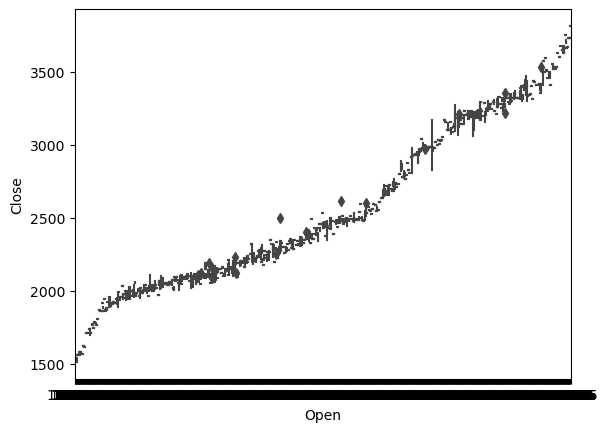

In [13]:
sns.boxplot(x="Open", y="Close", data=GLAXO)

<AxesSubplot:xlabel='Open', ylabel='High'>

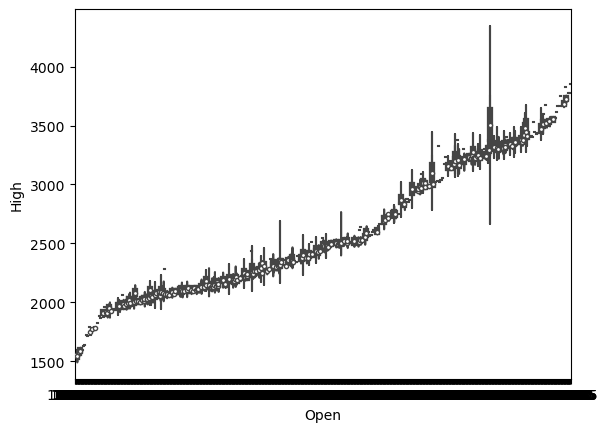

In [14]:
sns.violinplot(x="Open", y="High", data=GLAXO, size=6)

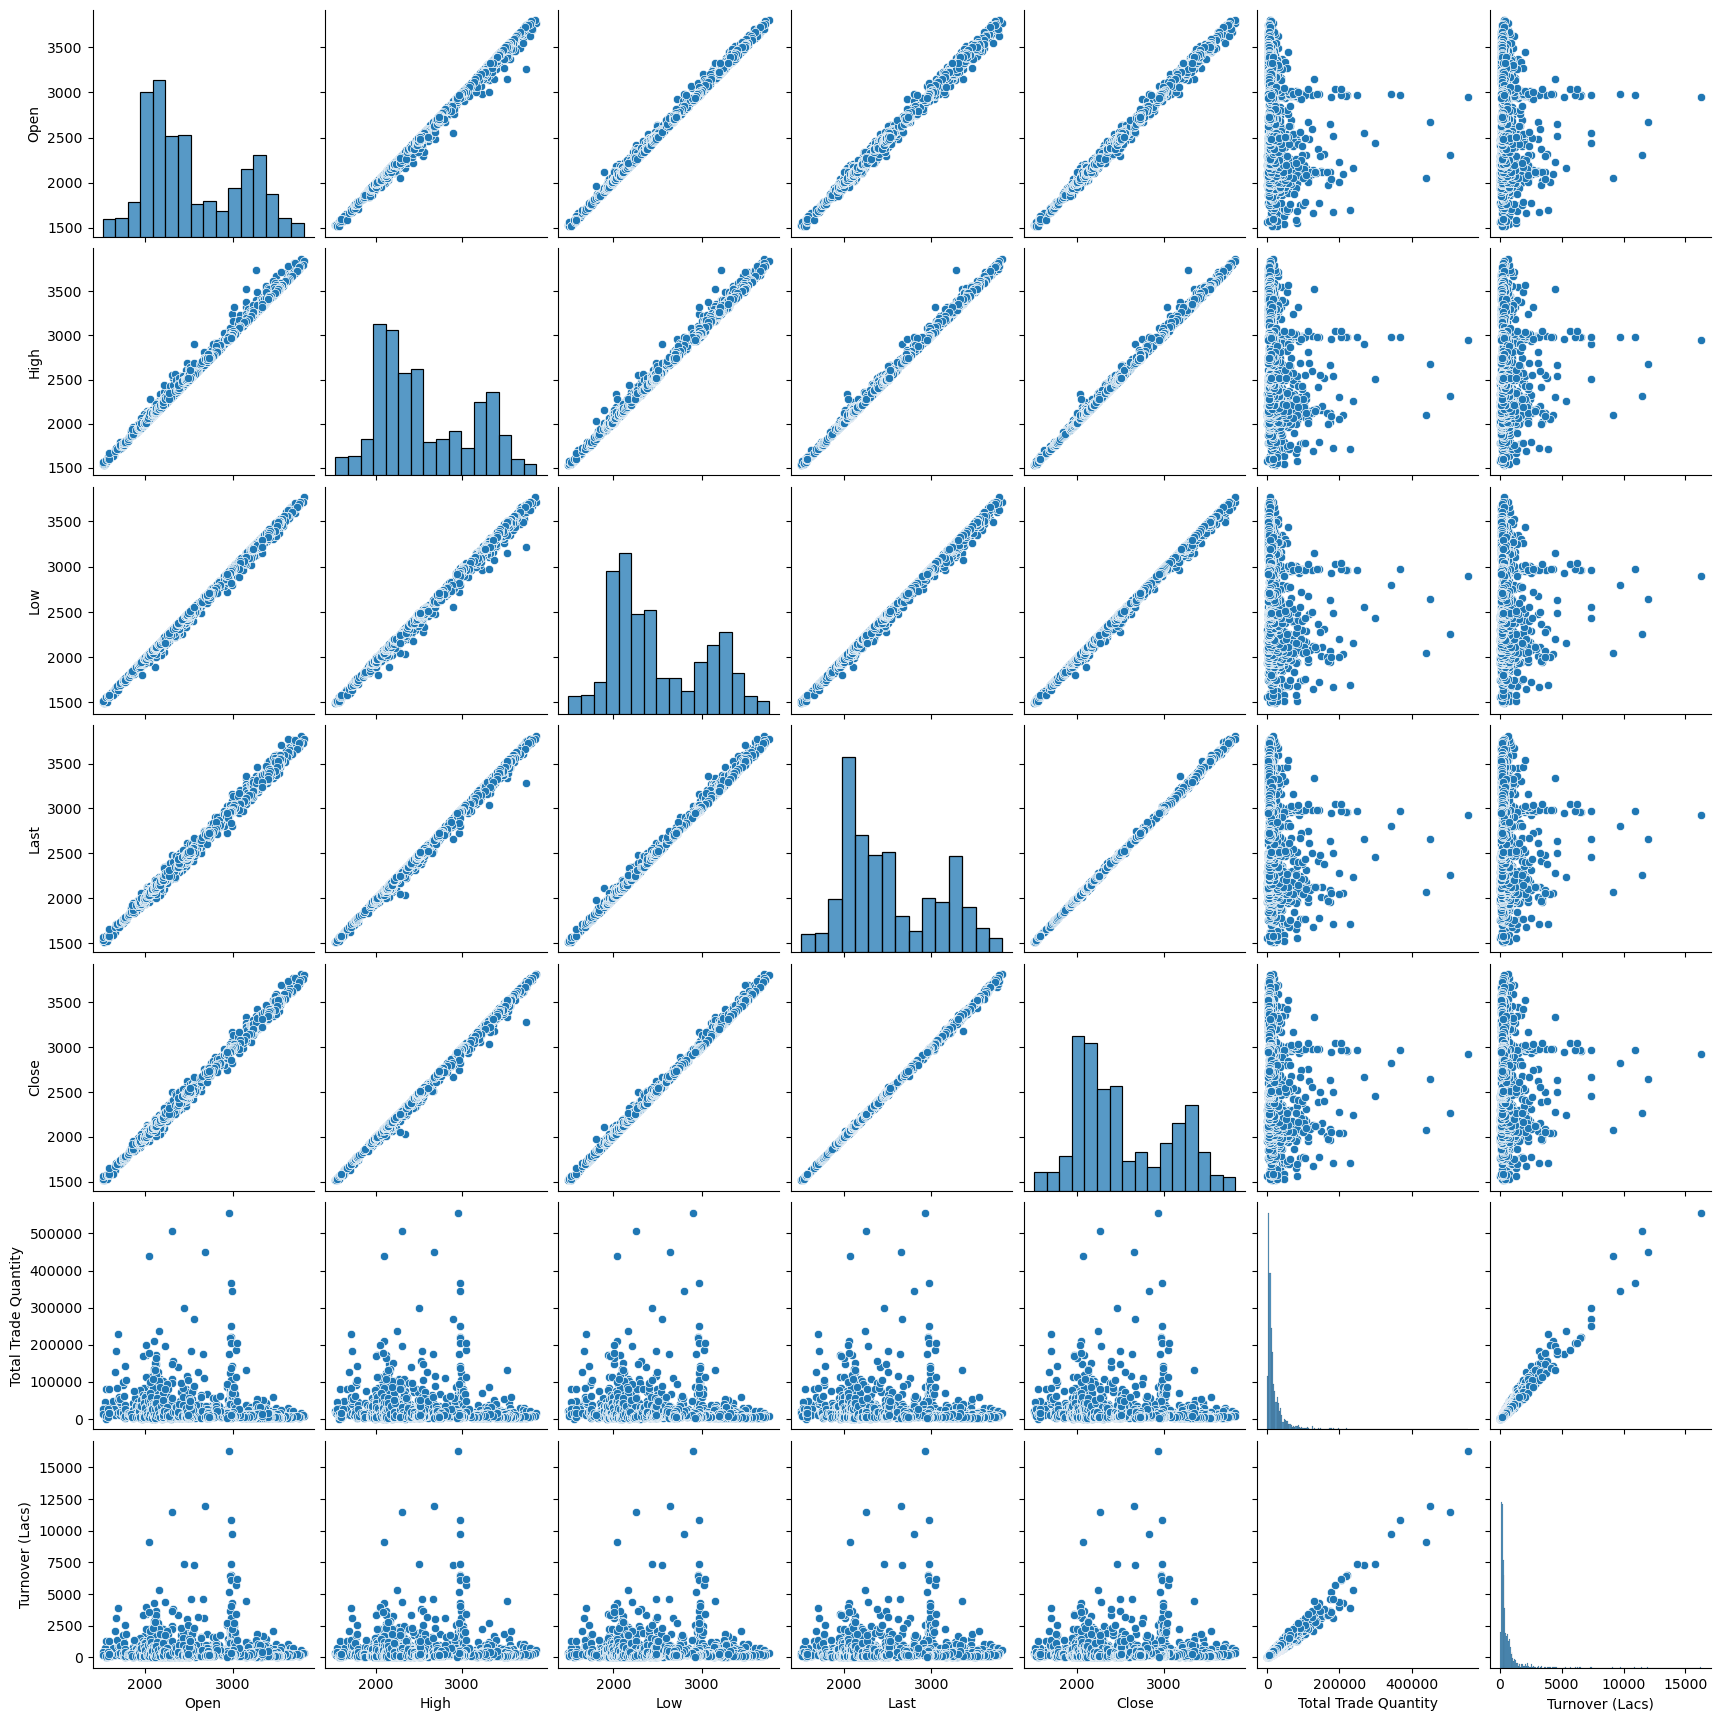

In [15]:
sns.pairplot(GLAXO)

<AxesSubplot:xlabel='Open', ylabel='Close'>

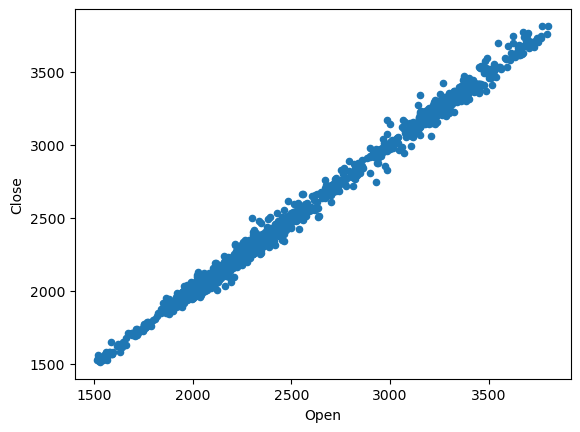

In [16]:
GLAXO.plot(kind="scatter",x="Open", y="Close")

In [17]:
GLAXO.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [18]:
GLAXO.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [19]:
GLAXO.columns.str.title()

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [20]:
GLAXO.rename(columns={'Date':'Dates'})

,Dates,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11
...,...,...,...,...,...,...,...,...
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87


In [21]:
dataset1=GLAXO.dropna()

In [22]:
dataset1

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11
...,...,...,...,...,...,...,...,...
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87


In [23]:
GLAXO1=GLAXO.iloc[:,1:]

In [24]:
GLAXO1

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11
...,...,...,...,...,...,...,...
1734,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87


In [25]:
GLAXO1_df = pd.DataFrame(GLAXO)

In [26]:
array = GLAXO1_df.values
X = array[:, 0:7]
Y = array[:, 7]

In [27]:
array

array([['2010-01-04', 1613.0, 1629.1, ..., 1625.65, 9365.0, 151.74],
       ['2010-01-05', 1639.95, 1639.95, ..., 1616.8, 38148.0, 622.58],
       ['2010-01-06', 1618.0, 1644.0, ..., 1638.5, 36519.0, 595.09],
       ...,
       ['2016-12-28', 2701.75, 2718.0, ..., 2702.15, 6050.0, 163.44],
       ['2016-12-29', 2702.05, 2739.0, ..., 2727.9, 7649.0, 207.87],
       ['2016-12-30', 2730.0, 2740.45, ..., 2729.8, 6513.0, 177.65]],
      dtype=object)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train,test=train_test_split(array,test_size=0.30,random_state=0)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
num_folds = 10
kfold = KFold(n_splits=10)

In [32]:
from matplotlib import pyplot as plt

In [33]:
import seaborn as sns

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_GLAXO = scaler.fit_transform(GLAXO.iloc[:,1:])

In [35]:
scaled_GLAXO

array([[-1.70154387, -1.7106344 , -1.68769103, ..., -1.67782902,
        -0.34975129, -0.41141866],
       [-1.65167614, -1.69079315, -1.67075385, ..., -1.69420067,
         0.37515027,  0.05765154],
       [-1.69229197, -1.68338698, -1.65961836, ..., -1.65405776,
         0.33412381,  0.03026487],
       ...,
       [ 0.31305694,  0.28062211,  0.34851284, ...,  0.31359248,
        -0.43323976, -0.39976264],
       [ 0.31361205,  0.31902453,  0.35216228, ...,  0.3612275 ,
        -0.39296885, -0.35549965],
       [ 0.36533016,  0.32167612,  0.3765855 , ...,  0.36474232,
        -0.42157908, -0.38560605]])

In [36]:
from sklearn.cluster import KMeans


In [37]:
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_GLAXO)
    ssd.append(kmeans.inertia_)

C:\Users\rajni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


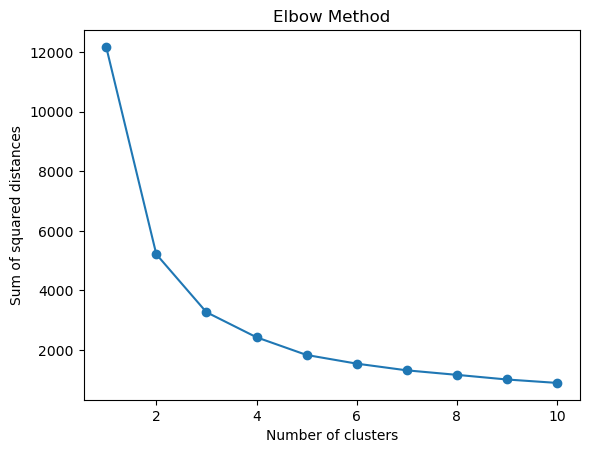

In [38]:
plt.plot(range(1, 11), ssd, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method")
plt.show()

In [39]:
from sklearn.cluster import KMeans
crime_clusters_new = KMeans(4, random_state=42)
crime_clusters_new.fit(scaled_GLAXO)

KMeans(n_clusters=4, random_state=42)

In [40]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_GLAXO)


KMeans(n_clusters=4, random_state=42)

In [41]:
cluster_labels = kmeans.labels_

In [42]:
cluster_centers = kmeans.cluster_centers_

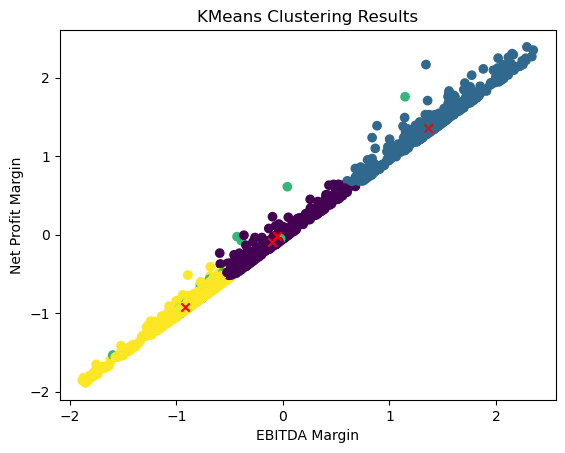

In [43]:
plt.scatter(scaled_GLAXO[:, 0], scaled_GLAXO[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c="red", marker="x")
plt.xlabel("EBITDA Margin")
plt.ylabel("Net Profit Margin")
plt.title("KMeans Clustering Results")
plt.show()